# 1. 이해하기

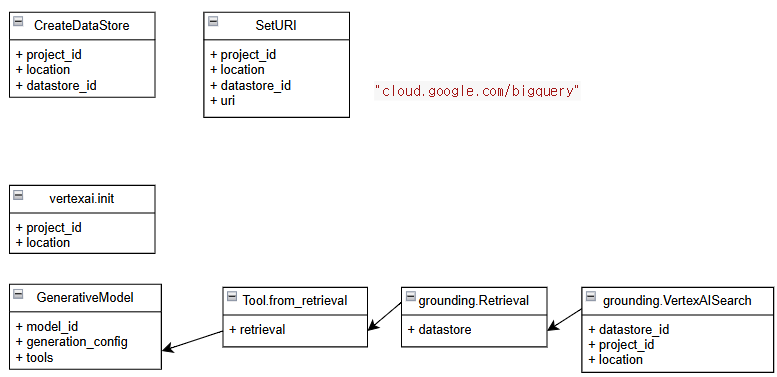

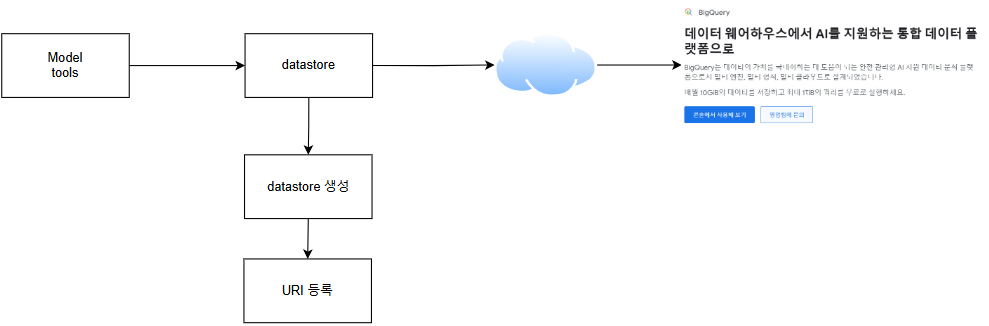

# 2. 코드 이해하기

## 2.1 라이브러리 설치

In [9]:
!pip install --upgrade google-cloud-discoveryengine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.0 MB/s eta 0:00:00


In [10]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## 2.2 초기화

In [4]:
PROJECT_ID = !gcloud config get-value core/project
PROJECT_ID = PROJECT_ID[0]
LOCATION="global"
DATASTORE_ID="web-datastore"

In [1]:
from google.cloud import discoveryengine_v1 as discoveryengine

## 2.3 함수 생성

In [2]:
def CreateDataStore(project_id, location, datastore_id):
  client = discoveryengine.DataStoreServiceClient()

  parent = client.collection_path(project_id, location, collection="default_collection")

  data_store=discoveryengine.DataStore(
      display_name=datastore_id,
      industry_vertical=discoveryengine.IndustryVertical.GENERIC,
      solution_types=[discoveryengine.SolutionType.SOLUTION_TYPE_SEARCH],
      content_config=discoveryengine.DataStore.ContentConfig.PUBLIC_WEBSITE
  )

  request = discoveryengine.CreateDataStoreRequest(
    parent=parent, data_store=data_store, data_store_id=datastore_id
  )

  return client.create_data_store(request=request)

def setURI(project_id, location, datastore_id, uri):
  client = discoveryengine.SiteSearchEngineServiceClient()

  parent = client.site_search_engine_path(project_id, location, datastore_id)
  target_site = discoveryengine.TargetSite(
      provided_uri_pattern=uri,
      type_ = discoveryengine.TargetSite.Type.INCLUDE,
      exact_match=False
  )

  return client.create_target_site(parent=parent, target_site=target_site,)

## 2.3 Data store 생성

In [5]:
operation = CreateDataStore(PROJECT_ID, LOCATION, DATASTORE_ID)
operation.result()

name: "projects/429718924597/locations/global/collections/default_collection/dataStores/web-datastore"
display_name: "web-datastore"
industry_vertical: GENERIC
solution_types: SOLUTION_TYPE_SEARCH
default_schema_id: "default_schema"
content_config: PUBLIC_WEBSITE

## 2.4 URI 등록

In [36]:
operation = setURI(PROJECT_ID, LOCATION, DATASTORE_ID, "cloud.google.com/bigquery")
operation.result()

name: "projects/429718924597/locations/global/collections/default_collection/dataStores/web-datastore/siteSearchEngine/targetSites/00062c4728b30ff2Y2xvdWQuZ29vZ2xlLmNvbS9iaWdxdWVyeSo"
provided_uri_pattern: "cloud.google.com/bigquery"
type_: INCLUDE
generated_uri_pattern: "cloud.google.com/bigquery*"
root_domain_uri: "google.com"
update_time {
  seconds: 1737533997
  nanos: 387000000
}

# 3. Vertex AI Search를 사용한 비공개 데이터에 대한 기본 응답

## 3.1 모델 생성

In [6]:
import vertexai

In [7]:
from vertexai.generative_models import(
    GenerativeModel,
    GenerationConfig,
    Tool,
    grounding
)

In [8]:
def getModel(project_id, init_location, grounding_location, datastore_id):
  vertexai.init(project=project_id, location=init_location)
  data_store= grounding.VertexAISearch(
              datastore=datastore_id,
              project=project_id,
              location=grounding_location
          )
  data_store_retrieval = grounding.Retrieval(data_store)
  tool = Tool.from_retrieval(data_store_retrieval)

  return GenerativeModel(
      "gemini-1.5-flash",
      generation_config=GenerationConfig(temperature=0.0),
      tools=[tool])

## 3.2 결과 확인

In [13]:
init_location="us-east1"
model = getModel(PROJECT_ID, init_location, LOCATION, DATASTORE_ID)

In [33]:
prompt="""
  bigquery에 대해 설명해 줘.
  지원된 URL에서만 검색해줘.
  관련 URL도 함께 공유해줘
"""

response = model.generate_content(prompt)
print(response.text)

## BigQuery: Google의 서버리스 데이터 웨어하우스

BigQuery는 Google Cloud Platform에서 제공하는 서버리스 데이터 웨어하우스 서비스입니다. 데이터 분석, 보고, 기계 학습 등 다양한 용도로 사용할 수 있습니다.

**주요 특징:**

* **서버리스:** 별도의 서버 관리 없이 데이터 저장 및 분석 가능
* **고성능:** 페타바이트 규모의 데이터를 빠르게 처리
* **확장성:** 필요에 따라 컴퓨팅 리소스를 쉽게 확장
* **SQL 지원:** 표준 SQL을 사용하여 데이터 쿼리
* **데이터 탐색 및 시각화:** BigQuery 웹 UI를 통해 데이터 탐색 및 시각화 가능
* **기계 학습 통합:** BigQuery ML을 통해 데이터 분석 및 예측 모델 구축
* **데이터 공유 및 협업:** 데이터 세트를 쉽게 공유하고 협업 가능

**장점:**

* **저렴한 비용:** 사용한 만큼만 비용 지불
* **높은 가용성:** Google의 글로벌 인프라를 통해 높은 가용성 보장
* **데이터 보안:** 강력한 보안 기능 제공
* **다양한 통합:** 다양한 Google Cloud Platform 서비스와 통합

**사용 사례:**

* **데이터 분석:** 대규모 데이터 세트 분석 및 보고
* **기계 학습:** 데이터 분석 및 예측 모델 구축
* **데이터 웨어하우스:** 데이터 저장 및 관리
* **데이터 시각화:** 데이터 시각화 및 대시보드 생성
* **데이터 공유 및 협업:** 데이터 세트 공유 및 협업

**관련 URL:**

* **BigQuery 공식 웹사이트:** [https://cloud.google.com/bigquery](https://cloud.google.com/bigquery)
* **BigQuery 문서:** [https://cloud.google.com/bigquery/docs](https://cloud.google.com/bigquery/docs)
* **BigQuery 가격 책정:** [h

In [35]:
prompt="""
  gemini에 대해 설명해 줘.
  지원된 URL에서만 검색해줘.
  관련 URL도 함께 공유해줘
"""

response = model.generate_content(prompt)
print(response.text)

죄송합니다. "gemini"에 대한 정보를 제공할 수 없습니다. 

"gemini"는 매우 일반적인 단어이기 때문에, 어떤 맥락에서 사용하고 싶은지 알려주시면 더 정확한 정보를 제공할 수 있습니다. 예를 들어, 다음과 같은 정보를 알려주세요:

* **gemini는 무엇을 의미하나요?** (예: 별자리, 쌍둥이, 소프트웨어 등)
* **어떤 분야에 대한 정보를 원하시나요?** (예: 천문학, 생물학, 컴퓨터 과학 등)
* **어떤 특정 URL에서 정보를 찾고 싶으신가요?**

이러한 정보를 제공해주시면, "gemini"에 대한 더 자세한 정보를 제공할 수 있습니다. 



In [29]:
prompt="""
  gemini에 대해 설명해 줘.
  관련 URL도 함께 공유해줘
"""

response = model.generate_content(prompt)
print(response.text)

## Gemini: 구글의 새로운 대규모 언어 모델

Gemini는 구글에서 개발한 새로운 대규모 언어 모델(LLM)입니다. 2023년 12월에 발표되었으며, 구글은 Gemini를 "가장 강력하고 다재다능한" LLM이라고 주장합니다. 

**Gemini의 주요 특징:**

* **다재다능함:** Gemini는 텍스트, 코드, 이미지, 오디오, 비디오 등 다양한 형태의 데이터를 이해하고 생성할 수 있습니다.
* **강력한 성능:** 구글은 Gemini가 기존 LLM보다 더 정확하고 창의적인 결과를 제공한다고 주장합니다.
* **다양한 크기:** Gemini는 다양한 크기로 제공되어 특정 작업에 맞게 최적화할 수 있습니다.
* **안전성:** 구글은 Gemini를 안전하고 책임감 있게 사용할 수 있도록 설계했습니다.

**Gemini의 활용 가능성:**

* **자동화된 작업:** 문서 요약, 번역, 코드 생성 등 다양한 작업을 자동화할 수 있습니다.
* **창의적인 콘텐츠 생성:** 시, 소설, 음악 등 창의적인 콘텐츠를 생성할 수 있습니다.
* **개인 맞춤형 서비스:** 사용자의 요구에 맞는 개인 맞춤형 서비스를 제공할 수 있습니다.
* **새로운 기술 개발:** 새로운 기술 개발에 활용될 수 있습니다.

**Gemini 관련 URL:**

* **구글 AI 블로그:** [https://ai.googleblog.com/2023/12/introducing-gemini-our-most-capable-ai.html](https://ai.googleblog.com/2023/12/introducing-gemini-our-most-capable-ai.html)
* **Gemini 웹사이트:** [https://gemini.google.com/](https://gemini.google.com/)

**참고:** Gemini는 아직 공개적으로 출시되지 않았으며, 구글은 향후 몇 달 안에 더 많은 정보를 공개할 예정입니다.

**요약:** Gemini는 구글의 새로운 대규모

# 4. reference

* https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/grounding?hl=ko
* https://cloud.google.com/generative-ai-app-builder/docs/create-data-store-es?hl=ko#genappbuilder_create_website_data_store-python
* https://cloud.google.com/vertex-ai/generative-ai/docs/ground-responses-using-rag?hl=ko
* https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini?hl=ko#generative-ai-gemini-grounding-python_vertex_ai_sdk
